In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
#1 Loading the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


8


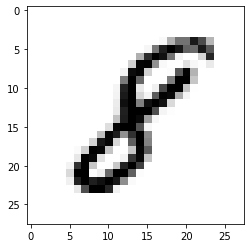

In [3]:
#2 visualize the data
import matplotlib.pyplot as plt
image_index = 7777 
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

In [4]:
#3 Preprocess the data
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_train= x_train.astype('float32')
x_test= x_test.astype('float32')
x_train= x_train/255
x_test = x_test/255
input_shape=(28,28,1)

In [5]:
#4 Create the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [6]:
# 5 Train the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 2ms/step - loss: 0.3976 - accuracy: 0.8765
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0616 - accuracy: 0.9810
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0441 - accuracy: 0.9861
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0339 - accuracy: 0.9891
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0265 - accuracy: 0.9913
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0225 - accuracy: 0.9926
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0179 - accuracy: 0.9941
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0179 - accuracy: 0.9942
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0163 - accuracy: 0.9946
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.01

In [7]:
# 6 evaluate the model
model.evaluate(x=x_test,y=y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0385 - accuracy: 0.9897


[0.038536131381988525, 0.9897000193595886]

3


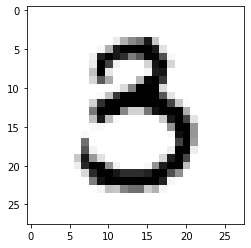

In [9]:
# visualize the results
image_index = 1150
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())